# 합성곱 신경망(CNN)


시간이 너무 걸려서 epochs 수를 500 => 50으로 변경

## 1.1 Min-Max Normalization 데이터 정규화 작업

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [3]:
# 데이터 갯수 확인하기
len(train_X), len(test_X), len(train_Y), len(test_Y)

(60000, 10000, 60000, 10000)

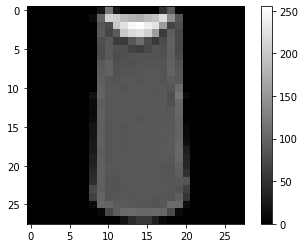

정답 범주:  0


In [4]:
# 이미지 확인하기
import matplotlib.pyplot as plt 
plt.imshow(train_X[2], cmap='gray')
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주: ", train_Y[2])

In [5]:
# 데이터 정규화 이전의 이미지 픽셀 행렬

# print(train_X[2])

최소-최대 정규화(Min-Max Normalization)

- 데이터를 정규화하는 가장 일반적인 방법

- 모든 feature에 대해 각각의 최소값 0, 최대값 1

- 그리고 0과 1 사이의 값으로 변환


$$
\frac{(X - MIN)}{(MAX - MIN)} = \frac{X - 0}{(255 - 0)}
$$


In [6]:
# 최소-최대 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [7]:
# 확인하기

# train_X[2]

## 다층 퍼셉트론에서의 이미지 처리

원본 데이터가 28x28의 2차원 array

Flatten()은 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순 레이어
- input_shape: 원본 데이터의 크기를 입력

Dense 레이어는 완전 연결 레이어

마지막 레이어의 units 값 10, 즉 정답 변수의 수와 동일


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단계

- Adam의 기본값: lr = 0.0001

- sparse_categorical_crossentropy: 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능

    - 희소행렬: 대부분의 값이 0 인 행렬
    
    ex) \[0, 0, 0, 0, 0, 0, 1\], \[0, 0, 0, 0, 1, 0, 0\]

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


신경망 학습 단계

In [11]:
history = model.fit(train_X, train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.5158 - accuracy: 0.8190 - val_loss: 0.4238 - val_accuracy: 0.8479
Epoch 2/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3912 - accuracy: 0.8597 - val_loss: 0.3805 - val_accuracy: 0.8648
Epoch 3/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3521 - accuracy: 0.8729 - val_loss: 0.3584 - val_accuracy: 0.8697
Epoch 4/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3223 - accuracy: 0.8804 - val_loss: 0.3412 - val_accuracy: 0.8779
Epoch 5/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.8873 - val_loss: 0.3479 - val_accuracy: 0.8733
Epoch 6/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2884 - accuracy: 0.8922 - val_loss: 0.3451 - val_accuracy: 0.8765
Epoch 7/500
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2753 - accuracy: 0.8996 - val_loss: 0.3400 - val_ac

정확도 및 손실값에 대한 결과 시각화

- 검증 데이터와 학습 데이터 비교

- 과적합 혹은 과소적합 확인

In [12]:
import matplotlib.pyplot as plt

def history_visualize(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'r--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', label='acc')
    plt.plot(history.history['val_accuracy'], 'k--', label='val_acc')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

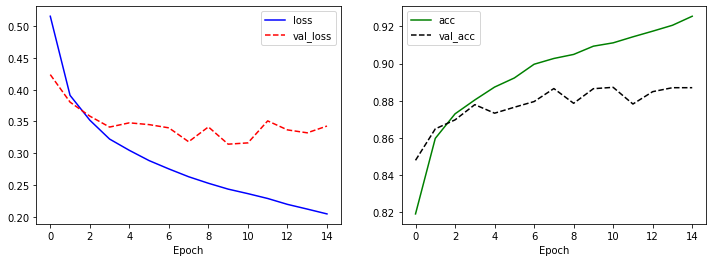

In [13]:
history_visualize(history)

최종 평가

- evaluuate(): 최종 정확도 및 손실값 확인

In [14]:
model.evaluate(test_X, test_Y)

# loss: 0.37633785605430603, accuracy: 0.8780999779701233

313/313 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8791


[0.3752504587173462, 0.8791000247001648]

예측

- predict(): 학습된 신경망을 활용하여 예측을 수행

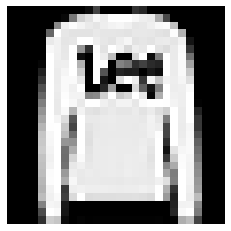

[[1.0000026 1.        1.9999099 1.        1.0000789 1.        1.0000085
  1.        1.        1.       ]]
예측 수행 범주:  2


In [15]:
# 예측 수행
pred = model.predict(test_X[[1]])

# 예측 이미지 확인
plt.imshow(test_X[1], cmap='gray')
plt.axis('off')
plt.show()

# 예측 결과 확인
# 결과를 보기 쉽게 하기 위해서 1을 더해줌
print(pred + 1)
print("예측 수행 범주: ", test_Y[1])


## 1.3 첫 번째 실험 - 합성곱 계층만 활용

- 실험 1. 합성곱 계층만 사용한 경우

- 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용한 경우

- 실험 3. VGGNet 스타일 구축

- 실험 4. 이미지 보강

- 합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수)

- reshape(): 기존 3차원에서 채널이 추가된 4차원 형태로 차원변경


In [16]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [17]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [18]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


분류 대상 이미지 및 범주 확인

- plt.subplot(4, 4, i+1): (행, 열, 순서)

- plt.imshow(train_X[i].reshape(28, 28), cmap='gray'): reshape(28, 28)을 통해 기존의 4차원에서 다시 2차원으로 변경하여 이미지 출력

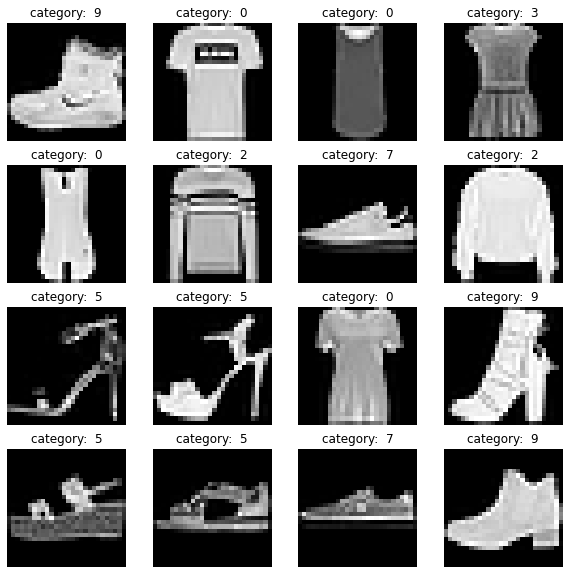

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [19]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"category:  {train_Y[i]}")
    plt.axis('off')

plt.show()
print(train_Y[:16])

### 실험 1. 합성곱 계층만 사용

풀링 레이어 없이 단순 합성곱 계층만 활용

tf.keras.layers.Conv2D()

  - input_shape: 입력 이미지의 크기 및 채널

  - kernel_size: 커널 사이즈

  - filters: 몇 개의 필터를 생성할 것 인지(# 점차 증가하면서 쌓아야 한다.)

  - strides: 건너뛰기(기본값 (1, 1))

  - padding: 패딩 방식(기본값 'valid')

tf.keras.layers.Flatten(): 다차원 레이어를 1차원으로 펼쳐준다.

In [20]:
# 단순 합성곱 계층만 활용
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16, strides=(1, 1), padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단게

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

- '풀링 계층'이 없기 때문에 약 400만개의 파라미터가 생성됨(파라미터가 너무 많다)

신경망 학습 단게

In [23]:
hist = model.fit(train_X, train_Y,
                epochs=500,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.4657 - accuracy: 0.8332 - val_loss: 0.4043 - val_accuracy: 0.8495
Epoch 2/500
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3331 - accuracy: 0.8787 - val_loss: 0.3770 - val_accuracy: 0.8671
Epoch 3/500
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2816 - accuracy: 0.8966 - val_loss: 0.3699 - val_accuracy: 0.8731
Epoch 4/500
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2414 - accuracy: 0.9118 - val_loss: 0.4130 - val_accuracy: 0.8616
Epoch 5/500
1407/1407 [==============================] - 6s 5ms/step - loss: 0.2085 - accuracy: 0.9228 - val_loss: 0.4194 - val_accuracy: 0.8746
Epoch 6/500
1407/1407 [==============================] - 6s 5ms/step - loss: 0.1831 - accuracy: 0.9319 - val_loss: 0.4688 - val_accuracy: 0.8690
Epoch 7/500
1407/1407 [==============================] - 6s 5ms/step - loss: 0.1643 - accuracy: 0.9393 - val_loss: 0.5647 - val_ac

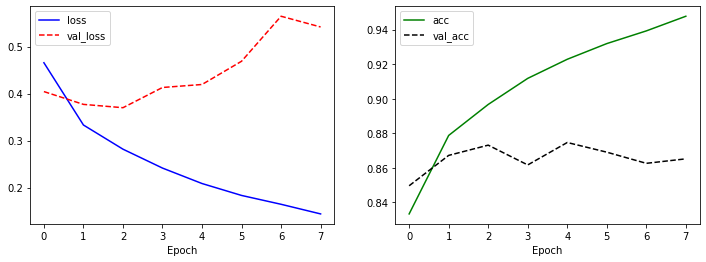

In [24]:
history_visualize(hist)

최종 평가

In [25]:
model.evaluate(test_X, test_Y)

# loss: 0.49804237484931946, accuracy: 0.8633999824523926

313/313 [==============================] - 1s 2ms/step - loss: 0.5905 - accuracy: 0.8603


[0.5905086994171143, 0.8603000044822693]

## 1.4 두 번째 실험 - 합성곱, 풀링, 드랍아웃 활용

합성곱, 풀링, 드랍아웃 활용

- 최대치 풀링: tf.keras.layers.MaxPool2D()

    - strides: 건너뛰기

    - pool size: 풀링 사이즈 설정 - 기본값: (2, 2)

- 평균치 풀링: tf.keras.layers.AveragePool2D()

- 드랍아웃 계층 생성: tf.keras.layers.Dropout()

    - rate: 이전 계층에서 제외할 뉴런의 비율 설정

In [26]:
# 합성곱 계층과 풀링 계층이 번갈아 가며 등장
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2, 2), pool_size=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.AvgPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

컴파일 단계

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

신경망 학습 단계

In [29]:
hist = model.fit(train_X, train_Y,
                epochs=500,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5703 - accuracy: 0.7905 - val_loss: 0.4721 - val_accuracy: 0.8189
Epoch 2/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4038 - accuracy: 0.8551 - val_loss: 0.3611 - val_accuracy: 0.8697
Epoch 3/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3672 - accuracy: 0.8681 - val_loss: 0.3398 - val_accuracy: 0.8763
Epoch 4/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3431 - accuracy: 0.8772 - val_loss: 0.3423 - val_accuracy: 0.8767
Epoch 5/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3227 - accuracy: 0.8832 - val_loss: 0.3088 - val_accuracy: 0.8877
Epoch 6/500
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3108 - accuracy: 0.8879 - val_loss: 0.3108 - val_accuracy: 0.8902
Epoch 7/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8916 - val_loss: 0.3085 - val_ac

정확도 및 손실값에 대한 결과 시각화

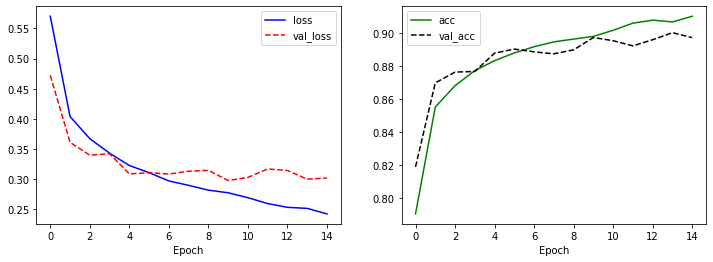

In [30]:
history_visualize(hist)

최종 평가

In [31]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3144 - accuracy: 0.8956


[0.3143720328807831, 0.8956000208854675]

## 1.5 세번째 실험 - VGGNet 스타일 적용

Style Transfer 논문에서도 VGGNet 활용

- VGGNet 스타일 일부 적용

    - 합성곱 계층 2개 적용 / 풀링 레이어 삽입

    - 합성곱 계층 2개 적용 / 풀링 레이어 삽입

    - 완전연결계층 적용

    - 완전연결계층 적용
    
    - 완전연결계층 적용

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'), 
])

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)        

신경망 학습 단계

In [34]:
hist = model.fit(train_X, train_Y,
                epochs=500,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5943 - accuracy: 0.7808 - val_loss: 0.3482 - val_accuracy: 0.8725
Epoch 2/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3786 - accuracy: 0.8634 - val_loss: 0.3139 - val_accuracy: 0.8848
Epoch 3/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3355 - accuracy: 0.8782 - val_loss: 0.2597 - val_accuracy: 0.9053
Epoch 4/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3040 - accuracy: 0.8895 - val_loss: 0.2868 - val_accuracy: 0.8935
Epoch 5/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2940 - accuracy: 0.8941 - val_loss: 0.2477 - val_accuracy: 0.9065
Epoch 6/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2789 - accuracy: 0.9006 - val_loss: 0.2222 - val_accuracy: 0.9183
Epoch 7/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2718 - accuracy: 0.9036 - val_loss: 0.2242 -

정확도 및 손실값에 대한 결과 시각화

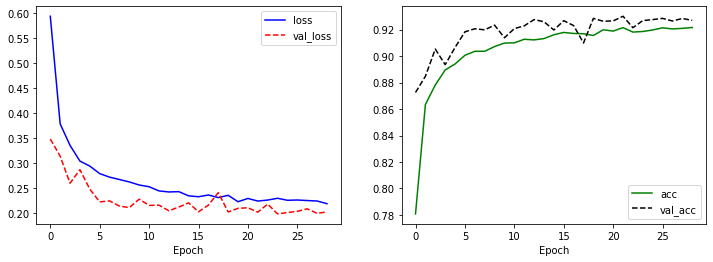

In [35]:
history_visualize(hist)

최종 평가

In [36]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2150 - accuracy: 0.9227


[0.2149805724620819, 0.9226999878883362]

## 네 번째 실험 - VGGNet + 이미지 보강

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [38]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

flow()

- 실제 보강된 이미지를 생성하는 함수는 iterator 라는 객체를 생성하는데,

- 이 객체에서는 값을 순서대로 꺼낼 수 있다.

- 그 방법은 next()를 사용해서 꺼낼 수 있고,

- 보강된 이미지들이 첫 번째에 위치해 있기 때문에 [0] 을 할당하여 꺼내주고, 한번에 꺼내는 이미지는 100장이 된다.

In [39]:
# 한번에 생성할 이미지의 수
augment_size = 100

# np.tile(): A를 reps에 정해진 형식만큼 반복
# 라벨값(y)은 딱히 줄 필요 없기에 np.zeros() 할당
# 배치 사이즈
# next() 로서 실제 값을 꺼냄
x_augment = image_generator.flow(x = np.tile(A = train_X[0].reshape(28*28),
                                              reps=100).reshape(-1, 28, 28, 1),
                                 y = np.zeros(augment_size),
                                 batch_size = augment_size,
                                 shuffle = False).next()[0]


x_augmented_1 = image_generator.flow(x = x_augment,
                                     y = np.zeros(augment_size),
                                     batch_size = augment_size,
                                     shuffle = False).next()[1]


In [40]:
print(x_augment.shape)
print(x_augmented_1.shape)

(100, 28, 28, 1)
(100,)


이미지 보강

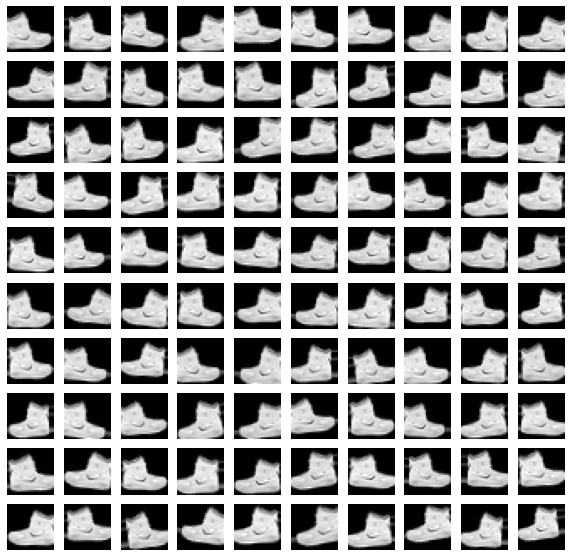

In [41]:
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(x_augment[i].reshape(28, 28), cmap='gray')
plt.show()

이미지 추가 생성

- 훈련 데이터의 50% 추가 생성

In [42]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 30000

# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size=augment_size, replace=False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()

# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제
print(np.random.randint(train_X.shape[0], size=augment_size))
print(np.random.choice(train_X.shape[0], size=augment_size, replace=False))

[32689 55257 52030 ... 42434 19025 15601]
[47110 35238 26967 ... 38078 42679 31645]


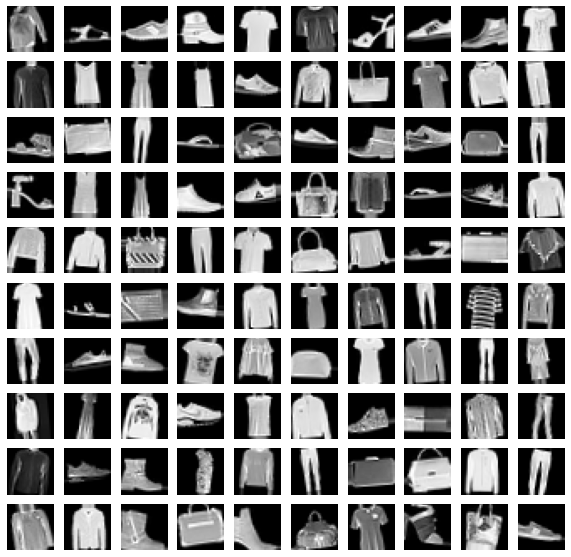

In [43]:
# 보강 이미지 데이터 생성
x_augmented = image_generator.flow(x = x_augmented,
                                  y = np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

# 보강 이미지 확인
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28, 28), cmap='gray')
plt.show()

In [44]:
# 데이터 합쳐주기
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

# 보강 데이터 결합 확인
print(train_X.shape)

(90000, 28, 28, 1)


신경망 모델 생성

- 가장 성능이 좋았던 VGGNet 스타일 적용

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'), 
])

컴파일 단계

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

신경망 학습 단계

In [47]:
hist = model.fit(train_X, train_Y,
                 epochs=500,
                 validation_split=0.25,
                 callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Epoch 1/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.5766 - accuracy: 0.7895 - val_loss: 0.5678 - val_accuracy: 0.7806
Epoch 2/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3819 - accuracy: 0.8619 - val_loss: 0.4859 - val_accuracy: 0.8201
Epoch 3/500
2110/2110 [==============================] - 16s 7ms/step - loss: 0.3424 - accuracy: 0.8752 - val_loss: 0.4401 - val_accuracy: 0.8325
Epoch 4/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3199 - accuracy: 0.8841 - val_loss: 0.4606 - val_accuracy: 0.8284
Epoch 5/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.3042 - accuracy: 0.8905 - val_loss: 0.4463 - val_accuracy: 0.8237
Epoch 6/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.2987 - accuracy: 0.8927 - val_loss: 0.4498 - val_accuracy: 0.8271
Epoch 7/500
2110/2110 [==============================] - 15s 7ms/step - loss: 0.2923 - accuracy: 0.8951 - val_loss: 0.4211 -

정확도 및 손실값에 대한 결과 시각화

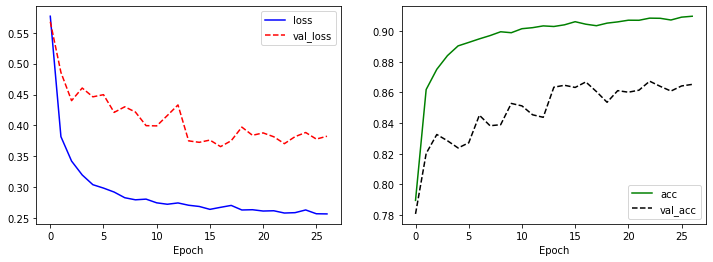

In [48]:
history_visualize(hist)

최종 평가

In [49]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9239


[0.21377304196357727, 0.9239000082015991]

예측 수행

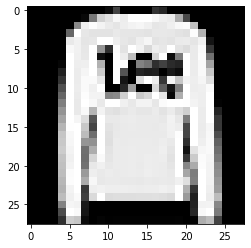

[[1.0000001 1.        1.9998248 1.        1.0000318 1.        1.0001433
  1.        1.        1.       ]]
예측 수행 범주:  2


In [50]:
# 예측하기
pred = model.predict(test_X[[1]])

# 예측 이미지 확인
plt.imshow(test_X[1].reshape(28, 28), cmap='gray')
plt.show()

# 예측 결과 확인
print(pred + 1)
print("예측 수행 범주: ", test_Y[1])